<a href="https://colab.research.google.com/github/felixzhao/stat501-project/blob/main/notebooks/V8_2_Analysis_of_5_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This version based on un-normalize data

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters"

Mounted at /content/drive
cluster_1.csv  cluster_2.csv  cluster_3.csv  cluster_4.csv  cluster_5.csv


# path

In [ ]:
output_dir = "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters"
cluster_paths = []
for i in range(1, 6):
    path = os.path.join(output_dir,f'cluster_{i}.csv')
    print(path)
    cluster_paths.append(path)

/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_1.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_2.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_3.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_4.csv
/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/clusters/cluster_5.csv


# functions

In [ ]:
def step_0_load(path_list):
    df_list = []
    for path in path_list:
        df = pd.read_csv(path, low_memory=False, index_col=False)
        df_list.append(df)
    return df_list

In [ ]:
def freq_plot(df):
    sns.histplot(df['daysOnProgram'], bins=50, kde=False)
    plt.title('Frequency Plot of daysOnProgram')
    plt.xlabel('Days on Program')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
def density_plot(dfs):
    fig, axes = plt.subplots(3, 2, figsize=(15, 10))

    for i, df in enumerate(dfs):
        row = i // 2
        col = i % 2
        sns.kdeplot(df['daysOnProgram'], ax=axes[row, col], shade=True)
        axes[row, col].set_title(f'Cluster {i+1}')
        axes[row, col].set_xlabel('Days on Program')
        axes[row, col].set_ylabel('Density')
        axes[row, col].set_xlim(left=0)

    plt.tight_layout()
    plt.show()

In [ ]:
dfs = step_0_load(cluster_paths)

In [ ]:
for i, df in enumerate(dfs):
    print(f"Cluster {i+1}: {len(df)}")
    # print(df["daysOnProgram"].min())

Cluster 1: 41
Cluster 2: 152
Cluster 3: 123
Cluster 4: 44
Cluster 5: 7


<ipython-input-6-0dd8ced21e22>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['daysOnProgram'], ax=axes[row, col], shade=True)
<ipython-input-6-0dd8ced21e22>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['daysOnProgram'], ax=axes[row, col], shade=True)
<ipython-input-6-0dd8ced21e22>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['daysOnProgram'], ax=axes[row, col], shade=True)
<ipython-input-6-0dd8ced21e22>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['daysOnProgram'], ax=axes

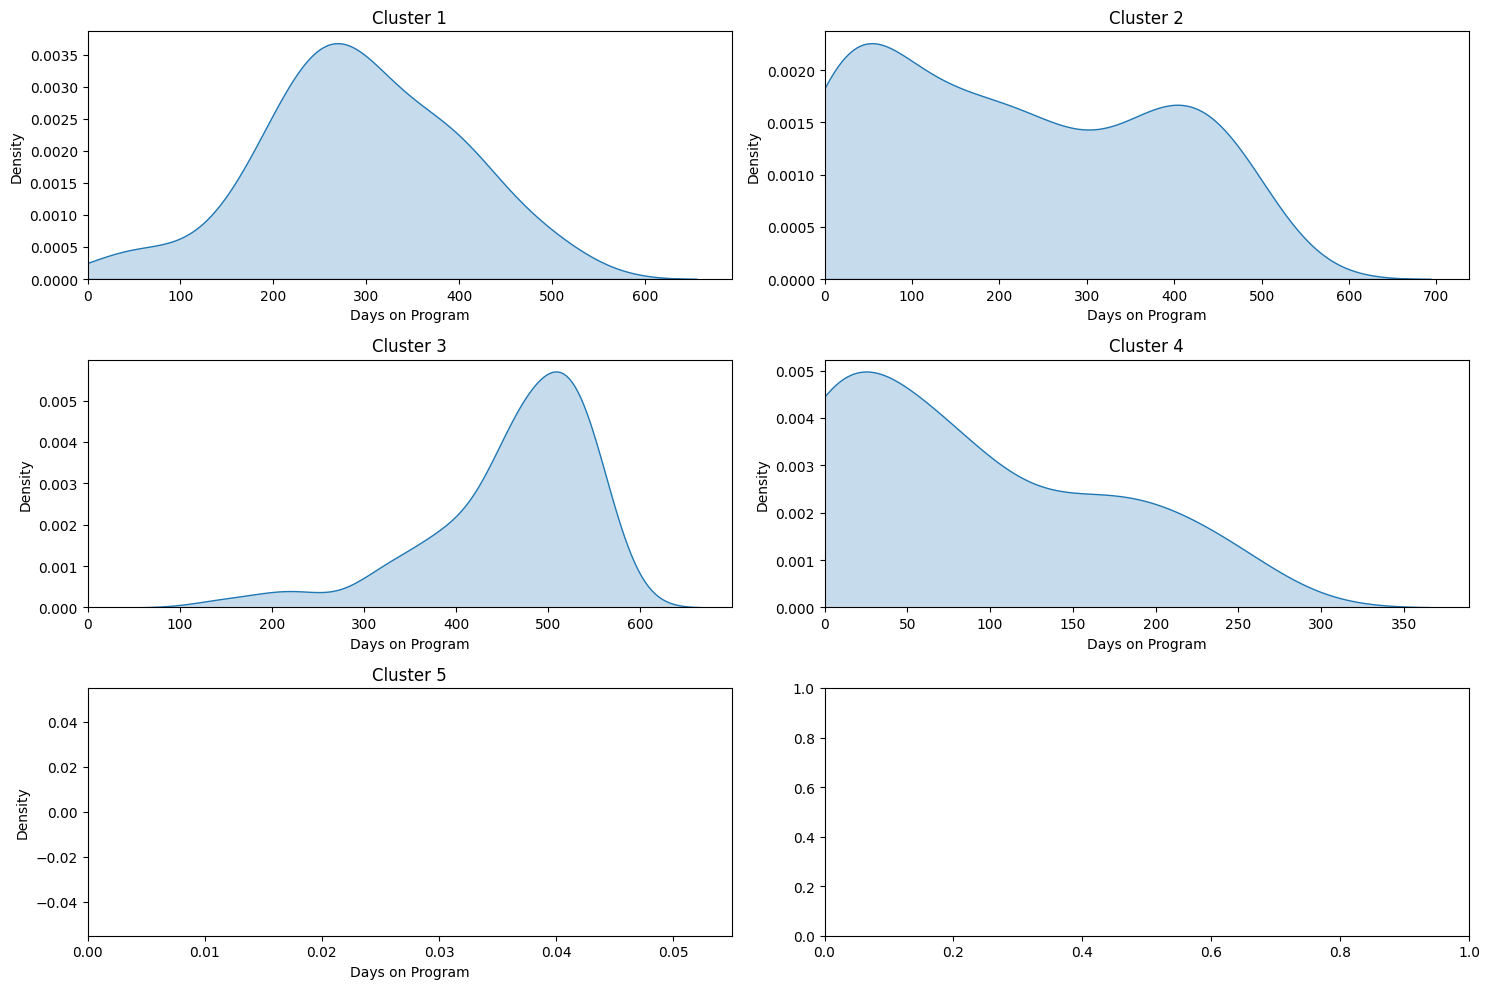

In [ ]:
density_plot(dfs)